In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tkh5044/portfolio/master/capstone-predicting-game-attendance/data/all-teams-1990-2016.csv')
df.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
0,1997-04-02,ANA,BOS,0,0.0,0 days 03:47:00.000000000,30874,0,0,0.000000,...,1997,4,2,2,Wednesday,Angel Stadium,33851,29.7,28.3,0
1,1997-04-03,ANA,BOS,3,-1.0,0 days 02:07:00.000000000,17323,-1,0,5.000000,...,1997,4,3,3,Thursday,Angel Stadium,33851,29.7,28.3,0
2,1997-08-22,ANA,BOS,2,-2.5,0 days 03:25:00.000000000,24977,-3,0,5.273438,...,1997,8,22,4,Friday,Angel Stadium,33851,29.7,28.3,0
3,1997-08-23,ANA,BOS,2,-2.5,0 days 02:49:00.000000000,20994,1,0,5.294574,...,1997,8,23,5,Saturday,Angel Stadium,33851,29.7,28.3,0
4,1997-08-24,ANA,BOS,2,-1.5,0 days 02:36:00.000000000,20733,2,0,5.300000,...,1997,8,24,6,Sunday,Angel Stadium,33851,29.7,28.3,0


In [4]:
# drop years before 2010 -> one year of data
df['date'] = pd.to_datetime(df['date'])
df = df[df.date > '2000-01-01']
df.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
3923,2000-04-03,ANA,NYY,0,0.0,0 days 03:02:00.000000000,42704,0,0,0.000000,...,2000,4,3,0,Monday,Angel Stadium,45050,27.7,28.9,0
3924,2000-04-04,ANA,NYY,3,-1.0,0 days 03:20:00.000000000,25818,-1,0,2.000000,...,2000,4,4,1,Tuesday,Angel Stadium,45050,27.7,28.9,0
3925,2000-04-05,ANA,NYY,4,-2.0,0 days 03:01:00.000000000,24560,-2,0,2.500000,...,2000,4,5,2,Wednesday,Angel Stadium,45050,27.7,28.9,0
3926,2000-08-11,ANA,NYY,3,-8.5,0 days 03:01:00.000000000,43169,-1,0,5.269565,...,2000,8,11,4,Friday,Angel Stadium,45050,27.7,28.9,0
3927,2000-08-12,ANA,NYY,3,-9.0,0 days 03:18:00.000000000,43394,1,0,5.293103,...,2000,8,12,5,Saturday,Angel Stadium,45050,27.7,28.9,0


In [5]:
# use only Oakland A's data
df_OAK = df[df.team_x == "OAK"]
df_OAK = df_OAK.sort_values(by=['date'])
df_OAK.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
4222,2000-04-03,OAK,DET,0,0.0,0 days 03:13:00.000000000,53498,0,0,0.00,...,2000,4,3,0,Monday,O.co Coliseum,43662,27.5,29.5,0
4223,2000-04-04,OAK,DET,3,-1.0,0 days 02:39:00.000000000,10188,-1,0,4.00,...,2000,4,4,1,Tuesday,O.co Coliseum,43662,27.5,29.5,0
4224,2000-04-05,OAK,DET,2,-1.0,0 days 02:42:00.000000000,10229,1,0,3.50,...,2000,4,5,2,Wednesday,O.co Coliseum,43662,27.5,29.5,0
5105,2000-04-07,OAK,CHW,1,0.0,0 days 03:36:00.000000000,10549,2,0,5.00,...,2000,4,7,4,Friday,O.co Coliseum,43662,27.5,29.5,0
5106,2000-04-08,OAK,CHW,3,-1.0,0 days 02:59:00.000000000,13125,-1,0,5.25,...,2000,4,8,5,Saturday,O.co Coliseum,43662,27.5,29.5,0


In [6]:
df_OAK.shape

(1375, 27)

(array([108., 290., 326., 232., 166., 150.,  39.,  34.,  16.,  14.]),
 array([ 6295. , 11264.4, 16233.8, 21203.2, 26172.6, 31142. , 36111.4,
        41080.8, 46050.2, 51019.6, 55989. ]),
 <BarContainer object of 10 artists>)

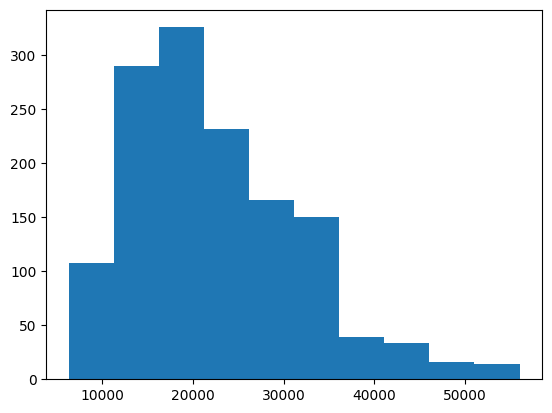

In [7]:
plt.hist([df_OAK["attendance"]])

<Axes: xlabel='date'>

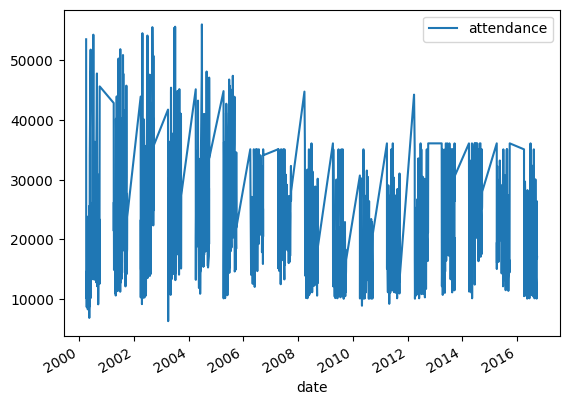

In [8]:
pd.DataFrame(df_OAK,columns=['date','attendance']).plot(x ='date', y='attendance', kind = 'line')

In [9]:
df_OAK.describe()


,div_rank,gb,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,...,win_pct,night_game,year,month,day,weekday,capacity,bat_age,pitch_age,division_game
count,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,...,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000
mean,2.501091,-5.779273,22697.038545,0.450909,0.002909,4.422553,4.537430,4.207564,0.468329,0.012364,...,0.504896,0.578909,2007.993455,6.559273,15.401455,3.175273,37988.301818,28.440000,27.464218,0.372364
std,1.195500,6.887258,9461.367938,2.709952,0.053877,0.830849,1.676265,1.476650,0.194478,0.110543,...,0.107344,0.493914,4.900980,1.728458,8.896804,1.988094,4207.785155,0.734986,0.924941,0.483610
min,0.000000,-25.500000,6295.000000,-9.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,...,0.000000,0.000000,2000.000000,3.000000,1.000000,0.000000,34077.000000,27.200000,25.700000,0.000000
25%,2.000000,-10.000000,15316.000000,-1.000000,0.000000,4.056555,3.400000,3.200000,0.316667,0.000000,...,0.450627,0.000000,2004.000000,5.000000,7.000000,1.000000,35067.000000,27.700000,26.900000,0.000000
50%,2.000000,-4.000000,20563.000000,1.000000,0.000000,4.476636,4.400000,4.000000,0.500000,0.000000,...,0.514286,1.000000,2008.000000,7.000000,16.000000,3.000000,35067.000000,28.600000,27.400000,0.000000
75%,3.000000,-1.000000,28147.000000,2.000000,0.000000,4.797285,5.600000,5.000000,0.600000,0.000000,...,0.567270,1.000000,2012.000000,8.000000,23.000000,5.000000,43662.000000,29.000000,28.000000,1.000000
max,5.000000,8.500000,55989.000000,19.000000,1.000000,8.000000,12.400000,10.400000,1.000000,1.000000,...,1.000000,1.000000,2016.000000,10.000000,31.000000,6.000000,43662.000000,29.600000,29.500000,1.000000


In [10]:
df_OAK.columns

Index(['date', 'team_x', 'opponent', 'div_rank', 'gb', 'time', 'attendance',
       'streak', 'double_header', 'runs_pg', 'runs_ma', 'runs_allowed_ma',
       'ten_game', 'opening_day', 'total_games', 'win_pct', 'night_game',
       'year', 'month', 'day', 'weekday', 'weekday_name', 'stadium',
       'capacity', 'bat_age', 'pitch_age', 'division_game'],
      dtype='object')

In [11]:
#bat_age -> average age of batter, pitch_age -> average age of pitcher, dont really help that much

In [12]:
df_OAK.dtypes

date               datetime64[ns]
team_x                     object
opponent                   object
div_rank                    int64
gb                        float64
time                       object
attendance                  int64
streak                      int64
double_header               int64
runs_pg                   float64
runs_ma                   float64
runs_allowed_ma           float64
ten_game                  float64
opening_day                 int64
total_games                 int64
win_pct                   float64
night_game                  int64
year                        int64
month                       int64
day                         int64
weekday                     int64
weekday_name               object
stadium                    object
capacity                    int64
bat_age                   float64
pitch_age                 float64
division_game               int64
dtype: object

In [13]:
'''
sns.pairplot(
    df_OAK,
    x_vars=list(df_OAK.columns.values),
    y_vars=["attendance"],
)
'''

'\nsns.pairplot(\n    df_OAK,\n    x_vars=list(df_OAK.columns.values),\n    y_vars=["attendance"],\n)\n'

In [14]:
df_OAK['new_series'] = [1] * len(df_OAK['attendance'])

In [15]:
df_OAK = df_OAK.reset_index()

In [16]:
lastRow = df_OAK.iloc[0]
for index, row in df_OAK.iterrows():
    if row['opponent'] == lastRow['opponent'] and index > 0:
        df_OAK.at[index,'new_series'] = 0
    lastRow = row
df_OAK.head()

,index,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,...,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game,new_series
0,4222,2000-04-03,OAK,DET,0,0.0,0 days 03:13:00.000000000,53498,0,0,...,4,3,0,Monday,O.co Coliseum,43662,27.5,29.5,0,1
1,4223,2000-04-04,OAK,DET,3,-1.0,0 days 02:39:00.000000000,10188,-1,0,...,4,4,1,Tuesday,O.co Coliseum,43662,27.5,29.5,0,0
2,4224,2000-04-05,OAK,DET,2,-1.0,0 days 02:42:00.000000000,10229,1,0,...,4,5,2,Wednesday,O.co Coliseum,43662,27.5,29.5,0,0
3,5105,2000-04-07,OAK,CHW,1,0.0,0 days 03:36:00.000000000,10549,2,0,...,4,7,4,Friday,O.co Coliseum,43662,27.5,29.5,0,1
4,5106,2000-04-08,OAK,CHW,3,-1.0,0 days 02:59:00.000000000,13125,-1,0,...,4,8,5,Saturday,O.co Coliseum,43662,27.5,29.5,0,0


In [17]:
columns = list(df_OAK.columns.values)
columns.remove('time')
columns.remove('team_x')
columns.remove('pitch_age')
columns.remove('bat_age')
columns

['index',
 'date',
 'opponent',
 'div_rank',
 'gb',
 'attendance',
 'streak',
 'double_header',
 'runs_pg',
 'runs_ma',
 'runs_allowed_ma',
 'ten_game',
 'opening_day',
 'total_games',
 'win_pct',
 'night_game',
 'year',
 'month',
 'day',
 'weekday',
 'weekday_name',
 'stadium',
 'capacity',
 'division_game',
 'new_series']

In [18]:
df_OAK = pd.get_dummies(df_OAK[columns],drop_first=True)
#df_OAK = df_OAK[columns]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#df_OAK_train = df_OAK[df_OAK.date < '2015-01-01']
#df_OAK_test = df_OAK[df_OAK.date > '2015-01-01']
df_OAK_train, df_OAK_test = train_test_split(df_OAK, test_size=0.3)

In [21]:
df_OAK_train.dtypes

index                              int64
date                      datetime64[ns]
div_rank                           int64
gb                               float64
attendance                         int64
streak                             int64
double_header                      int64
runs_pg                          float64
runs_ma                          float64
runs_allowed_ma                  float64
ten_game                         float64
opening_day                        int64
total_games                        int64
win_pct                          float64
night_game                         int64
year                               int64
month                              int64
day                                int64
weekday                            int64
capacity                           int64
division_game                      int64
new_series                         int64
opponent_ARI                       uint8
opponent_ATL                       uint8
opponent_BAL    

In [22]:
columns = list(df_OAK.columns.values)
columns.remove('date')
columns.remove('attendance')

In [23]:
columns

['index',
 'div_rank',
 'gb',
 'streak',
 'double_header',
 'runs_pg',
 'runs_ma',
 'runs_allowed_ma',
 'ten_game',
 'opening_day',
 'total_games',
 'win_pct',
 'night_game',
 'year',
 'month',
 'day',
 'weekday',
 'capacity',
 'division_game',
 'new_series',
 'opponent_ARI',
 'opponent_ATL',
 'opponent_BAL',
 'opponent_BOS',
 'opponent_CHC',
 'opponent_CHW',
 'opponent_CIN',
 'opponent_CLE',
 'opponent_COL',
 'opponent_DET',
 'opponent_FLA',
 'opponent_HOU',
 'opponent_KCR',
 'opponent_LAA',
 'opponent_LAD',
 'opponent_MIL',
 'opponent_MIN',
 'opponent_MON',
 'opponent_NYM',
 'opponent_NYY',
 'opponent_PHI',
 'opponent_PIT',
 'opponent_SDP',
 'opponent_SEA',
 'opponent_SFG',
 'opponent_STL',
 'opponent_TBD',
 'opponent_TBR',
 'opponent_TEX',
 'opponent_TOR',
 'opponent_WSN',
 'weekday_name_Monday',
 'weekday_name_Saturday',
 'weekday_name_Sunday',
 'weekday_name_Thursday',
 'weekday_name_Tuesday',
 'weekday_name_Wednesday']

In [24]:
X_train = df_OAK_train[columns]
X_test = df_OAK_test[columns]
y_train = df_OAK_train['attendance']
y_test = df_OAK_test['attendance']

In [25]:
X_train.describe()

,index,div_rank,gb,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,...,opponent_TBR,opponent_TEX,opponent_TOR,opponent_WSN,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,...,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000
mean,35936.417879,2.491684,-5.629938,0.432432,0.003119,4.425009,4.492533,4.176507,0.470893,0.011435,...,0.021830,0.112266,0.064449,0.003119,0.099792,0.151767,0.153846,0.106029,0.149688,0.166320
std,20459.390181,1.194173,6.832221,2.660089,0.055785,0.826470,1.676834,1.460115,0.191243,0.106374,...,0.146203,0.315858,0.245679,0.055785,0.299879,0.358982,0.360989,0.308035,0.356951,0.372561
min,3977.000000,0.000000,-25.500000,-9.000000,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15226.250000,2.000000,-10.000000,-1.000000,0.000000,4.061565,3.400000,3.200000,0.375000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42552.500000,2.000000,-4.000000,1.000000,0.000000,4.493048,4.200000,4.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55767.750000,3.000000,-1.000000,2.000000,0.000000,4.800000,5.575000,5.000000,0.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61857.000000,5.000000,8.500000,19.000000,1.000000,8.000000,12.400000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
X_train.dtypes

index                       int64
div_rank                    int64
gb                        float64
streak                      int64
double_header               int64
runs_pg                   float64
runs_ma                   float64
runs_allowed_ma           float64
ten_game                  float64
opening_day                 int64
total_games                 int64
win_pct                   float64
night_game                  int64
year                        int64
month                       int64
day                         int64
weekday                     int64
capacity                    int64
division_game               int64
new_series                  int64
opponent_ARI                uint8
opponent_ATL                uint8
opponent_BAL                uint8
opponent_BOS                uint8
opponent_CHC                uint8
opponent_CHW                uint8
opponent_CIN                uint8
opponent_CLE                uint8
opponent_COL                uint8
opponent_DET  

In [27]:
X_train.columns.difference(X_test.columns).tolist()

[]

In [28]:
X_train.shape

(962, 57)

In [29]:
X_test.shape

(413, 57)

In [30]:
y_train.shape

(962,)

In [31]:
y_test.shape

(413,)

## Train Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error

In [33]:
def trainModel(model):
  model.fit(X_train, y_train)
  score=model.score(X_test, y_test)
  mae=mean_absolute_error(y_test,model.predict(X_test))

  return score,mae,

In [34]:
trainModel(LinearRegression())

(0.49778584338148957, 5011.511860098484)

In [35]:
trainModel(DecisionTreeRegressor())

(0.20222654804599283, 5793.493946731235)

In [36]:
trainModel(XGBRegressor())

(0.5250808120837693, 4668.077730118795)

In [37]:
trainModel(RandomForestRegressor())

(0.5786783079479799, 4322.136464891041)

In [38]:
trainModel(XGBRFRegressor())

(0.5516379958993278, 4718.435317512864)

In [39]:
df_OAK_test = df_OAK_test.sort_values(by=['date'])

In [1]:
def plotModel(model):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  #plt.plot(df_OAK['date'][-162:], predictions, "--") #predicted
  #plt.plot(df_OAK['date'][-162:], y_test) #actual
  plt.plot(df_OAK_test['date'][-81:], predictions[-81:], "--") #predicted
  plt.plot(df_OAK_test['date'][-81:], y_test[-81:]) #actual
  return np.abs(predictions-y_test).median()

3948.9398682951123

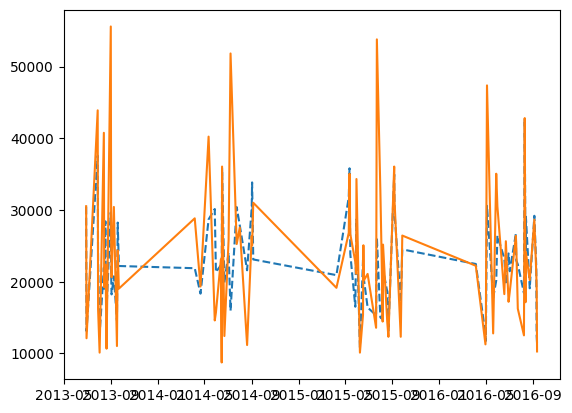

In [40]:
plotModel(LinearRegression())

4413.0

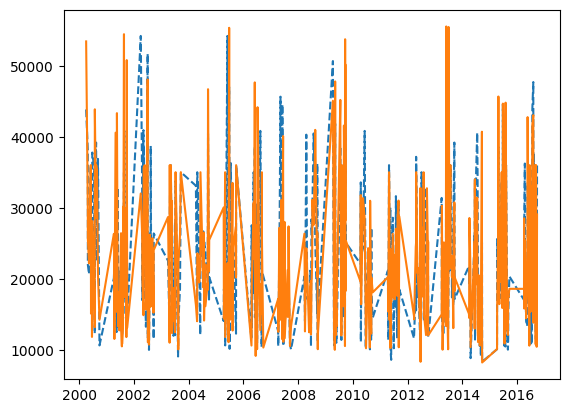

In [315]:
plotModel(DecisionTreeRegressor())

3147.0200000000004

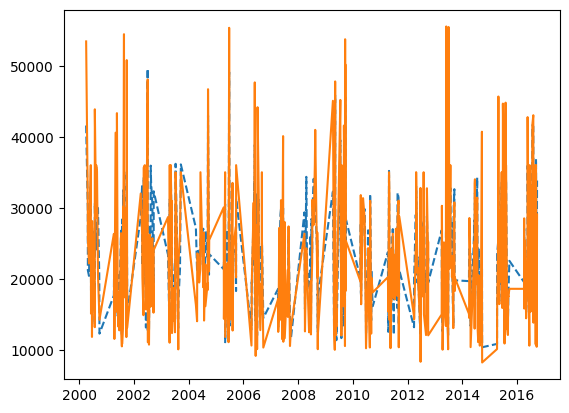

In [316]:
best_model = RandomForestRegressor(random_state=0)
best_model.fit(X_train, y_train)
plotModel(best_model)

In [ ]:
from time import time
time1 = time()
newModel = RandomForestRegressor(random_state=0)
newModel.fit(X_train, y_train)
newModel.score(X_test, y_test)
time2 = time()
time2 - time1


2.0210957527160645

## Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# ensemble:
# - boosting: XGBost, GradientBoost, AdaBoost
# - bagging: Random Forest

### Hyper parameter tuning 1st iteration

In [ ]:
params={'max_depth': [32, 64, 100, 200, None],
 'max_features': ['auto', 'log2', None],
 'min_samples_leaf': [2, 4, 6],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [32, 64, 100, 200]}

model = RandomForestRegressor(random_state=1)
grid_search=RandomizedSearchCV(model,params,cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'max_depth': [32, 64, 100, 200, None],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [32, 64, 100, 200]},
                   scoring='neg_mean_absolute_error')

In [ ]:
## Overfitting

In [ ]:
grid_search.best_params_

{'max_depth': 100,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
best_model1=grid_search.best_estimator_
predictions1 = best_model1.predict(X_test)
trainModel(best_model1)

(0.6162094151018309, 3354.2759687699136)

2247.0945230880207

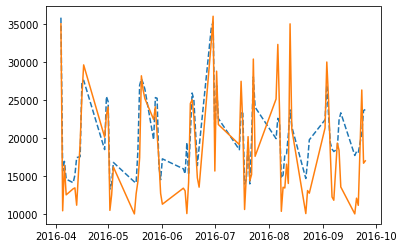

In [ ]:
plotModel(best_model1)

### Hyper parameter tuning 2nd iteration

In [ ]:
params={'max_depth': [70, 90, 100, 110, 120, None],
 'max_features': ['auto', 'log2', None],
 'min_samples_leaf': [2, 3, 5],
 'min_samples_split': [5, 6, 7, 8],
 'n_estimators': [70, 90, 100, 110, 120]}

model = RandomForestRegressor(random_state=1)
grid_search=RandomizedSearchCV(model,params,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'max_depth': [70, 90, 100, 110, 120,
                                                      None],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [2, 3, 5],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [70, 90, 100, 110,
                                                         120]},
                   scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_

{'max_depth': 110,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
best_model2=grid_search.best_estimator_
predictions2 = best_model2.predict(X_test)
trainModel(best_model2)

(0.6162094151018309, 3354.2759687699136)

2247.0945230880207

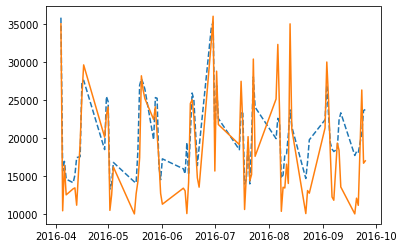

In [ ]:
plotModel(best_model2)

## Hyper parameter Tuning on XGBoost

In [ ]:
params={'n_estimators':[100,200,500],'max_depth':[2,5,10],'learning_rate':[0.01,0.1,0.5]}

model = XGBRegressor(objective="reg:squarederror")
grid_search=GridSearchCV(model,params,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}

In [ ]:
best_model3=grid_search.best_estimator_
predictions3 = best_model3.predict(X_test)
trainModel(best_model3)

(0.5599916761056847, 3842.3571686921296)

In [ ]:
mean_absolute_error(y_test.values, predictions3)

3842.3571686921296

## Feature Engineering / Feature Selection

1. Create new features from the ones that we have
2. Select relevant features based on some numerical/statistical decision. .e.g feature importance from Random Forest, SHAP

In [ ]:
for ii,col in enumerate(X_train.columns):
  print(col,best_model.feature_importances_[ii])

div_rank 0.011030861869432178
gb 0.025943379051279396
streak 0.021551368847332112
double_header 0.00015603025856146546
runs_pg 0.04979736119533113
runs_ma 0.02825526534486901
runs_allowed_ma 0.031067817261996332
ten_game 0.016622768915144037
opening_day 0.04145867063324229
total_games 0.05699116375812894
win_pct 0.09036668993431916
night_game 0.01083874043544164
year 0.24675160038398286
month 0.009813518098838056
day 0.03224473362427327
weekday 0.12434276491381965
division_game 0.0025822892159100704
opponent_ARI 0.0005840109704101888
opponent_ATL 8.034141172811325e-05
opponent_BAL 0.0012611163696895067
opponent_BOS 0.023752356833833765
opponent_CAL 0.0008057974827248383
opponent_CHC 0.0002491379292285162
opponent_CHW 0.0018017392555137709
opponent_CIN 5.428099186399616e-05
opponent_CLE 0.002512208679947684
opponent_COL 0.0001287777975421398
opponent_DET 0.0022025195225238953
opponent_FLA 0.000116959973301624
opponent_HOU 0.0004378892401770933
opponent_KCR 0.0026679777549730504
opponent

In [ ]:
important_features=X_train.columns[best_model.feature_importances_.argsort()[::-1]][:40]
important_features

Index(['year', 'weekday', 'win_pct', 'opponent_SFG', 'total_games', 'runs_pg',
       'opening_day', 'opponent_NYY', 'day', 'runs_allowed_ma', 'runs_ma',
       'gb', 'opponent_BOS', 'streak', 'ten_game', 'weekday_name_Wednesday',
       'div_rank', 'night_game', 'month', 'weekday_name_Thursday',
       'opponent_LAD', 'opponent_SEA', 'opponent_KCR', 'opponent_TEX',
       'division_game', 'opponent_CLE', 'opponent_DET', 'opponent_MIL',
       'opponent_TOR', 'opponent_CHW', 'opponent_TBD', 'opponent_MIN',
       'weekday_name_Monday', 'weekday_name_Saturday', 'weekday_name_Tuesday',
       'opponent_LAA', 'opponent_BAL', 'weekday_name_Sunday', 'opponent_CAL',
       'opponent_ARI'],
      dtype='object')

In [ ]:
X_train_red=X_train.loc[:,important_features]
X_test_red=X_test.loc[:,important_features]

In [ ]:
X_train.shape,X_train_red.shape

((2061, 55), (2061, 40))

In [ ]:
X_train.columns

Index(['div_rank', 'gb', 'streak', 'double_header', 'runs_pg', 'runs_ma',
       'runs_allowed_ma', 'ten_game', 'opening_day', 'total_games', 'win_pct',
       'night_game', 'year', 'month', 'day', 'weekday', 'division_game',
       'opponent_ARI', 'opponent_ATL', 'opponent_BAL', 'opponent_BOS',
       'opponent_CAL', 'opponent_CHC', 'opponent_CHW', 'opponent_CIN',
       'opponent_CLE', 'opponent_COL', 'opponent_DET', 'opponent_FLA',
       'opponent_HOU', 'opponent_KCR', 'opponent_LAA', 'opponent_LAD',
       'opponent_MIL', 'opponent_MIN', 'opponent_MON', 'opponent_NYM',
       'opponent_NYY', 'opponent_PHI', 'opponent_PIT', 'opponent_SDP',
       'opponent_SEA', 'opponent_SFG', 'opponent_STL', 'opponent_TBD',
       'opponent_TBR', 'opponent_TEX', 'opponent_TOR', 'opponent_WSN',
       'weekday_name_Monday', 'weekday_name_Saturday', 'weekday_name_Sunday',
       'weekday_name_Thursday', 'weekday_name_Tuesday',
       'weekday_name_Wednesday'],
      dtype='object')

In [ ]:
model4 = RandomForestRegressor()
model4.fit(X_train_red, y_train)

RandomForestRegressor()

In [ ]:
predictions4 = model4.predict(X_test_red)
mean_absolute_error(y_test.values, predictions4)

3538.427530864197

2627.3499999999985

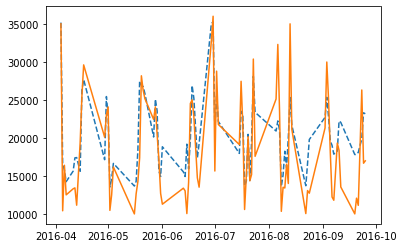

In [ ]:
plotModel(model4)